In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
# importing Sequential from keras
from tensorflow.keras.models import Sequential
#importing Dense and Conv2D layers from keras
from tensorflow.keras.layers import Dense,Conv2D

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"base_input" , shuffle = True , 
    image_size =(IMAGE_SIZE ,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 9000 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Tomato__Healthy', 'Tomato__Unhealthy']

In [6]:
for image_batch, label_batch in dataset:
   # print(image_batch.shape)
    train_df = image_batch.numpy().astype('uint8')
    
    train_label = label_batch.numpy()
 

In [7]:
print(train_df)
  

[[[[116 106 105]
   [135 125 124]
   [119 109 108]
   ...
   [109  99  98]
   [133 123 122]
   [146 136 135]]

  [[121 111 110]
   [104  94  93]
   [ 94  84  83]
   ...
   [114 104 103]
   [125 115 114]
   [121 111 110]]

  [[114 104 103]
   [126 116 115]
   [129 119 118]
   ...
   [ 94  84  83]
   [116 106 105]
   [128 118 117]]

  ...

  [[164 153 157]
   [158 147 151]
   [147 136 140]
   ...
   [157 145 149]
   [165 153 157]
   [158 146 150]]

  [[156 145 149]
   [160 149 153]
   [151 140 144]
   ...
   [168 156 160]
   [160 148 152]
   [152 140 144]]

  [[160 149 153]
   [170 159 163]
   [160 149 153]
   ...
   [146 134 138]
   [130 118 122]
   [143 131 135]]]


 [[[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  3   3   3]
   [  3   3   3]
   [  3   3   3]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  3   3   3]
   [  3   3   3]
   [  3   3   3]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  3   3   3]
   [  3   3   3]
   [  3   3

In [8]:
print(train_label)

[1 1 1 1 1 1 1 1]


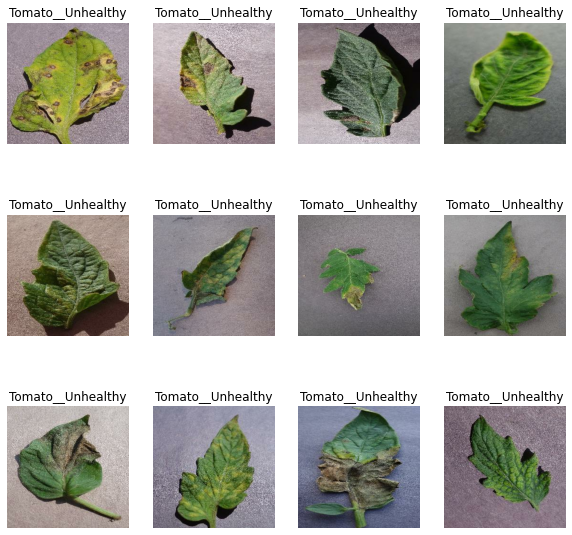

In [9]:
plt.figure(figsize =(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split =0.1 , test_split=0.1, shuffle = True,shuffle_size =10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds, test_ds

In [11]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [12]:
len(train_ds)

225

In [13]:
len(val_ds)

28

In [14]:
len(test_ds)

29

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
 ])

In [255]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=16, max_value= 96, step=8 ),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
    keras.layers.MaxPooling2D((2,2)),
  
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value= 32, max_value= 160, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
      keras.layers.MaxPooling2D((2,2)),
  
       keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_3_filter', min_value=32, max_value= 256, step= 32),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        #activation function
        activation='relu',
   
    ),
      keras.layers.MaxPooling2D((2,2)),
  
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_4_filter', min_value=64 , max_value = 314, step=32),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_4_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(256,256,3),
    ),
      keras.layers.MaxPooling2D((2,2)),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value= 100 , max_value= 300 , step= 50),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(2, activation='sigmoid')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [256]:
#importing random search
from keras_tuner import BayesianOptimization
#creating randomsearch object
tuner = BayesianOptimization(build_model,
                    objective='val_accuracy',
                    overwrite = 'true',
                    max_trials = 4)
# search best parameter

In [ ]:
tuner.search(train_ds,epochs= 4 ,validation_data=val_ds)

In [234]:
tuner.get_best_hyperparameters()[0].values

{'conv_1_filter': 16,
 'conv_1_kernel': 3,
 'conv_2_filter': 32,
 'conv_2_kernel': 5,
 'conv_3_filter': 64,
 'conv_3_kernel': 3,
 'conv_4_filter': 256,
 'conv_4_kernel': 5,
 'dense_1_units': 300,
 'learning_rate': 0.001}

In [235]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [236]:
#some changes for optimal number of epochs

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', mode ='min' , patience = 5 , restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs = 30,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,
    callbacks = [earlystopping]

)

Epoch 1/30
225/225 [==============================] - 210s 934ms/step - loss: 0.1177 - accuracy: 0.9691 - val_loss: 0.0214 - val_accuracy: 0.9922
Epoch 2/30
225/225 [==============================] - 218s 969ms/step - loss: 0.2266 - accuracy: 0.9404 - val_loss: 0.2974 - val_accuracy: 0.8850
Epoch 3/30
225/225 [==============================] - 24421s 109s/step - loss: 0.4911 - accuracy: 0.8846 - val_loss: 0.2485 - val_accuracy: 0.8850
Epoch 4/30
225/225 [==============================] - 215s 954ms/step - loss: 0.3492 - accuracy: 0.8894 - val_loss: 0.3524 - val_accuracy: 0.8850
Epoch 5/30
225/225 [==============================] - 230s 1s/step - loss: 0.3432 - accuracy: 0.8894 - val_loss: 0.3516 - val_accuracy: 0.8839
Epoch 6/30
225/225 [==============================] - 215s 957ms/step - loss: 0.3641 - accuracy: 0.8894 - val_loss: 0.3437 - val_accuracy: 0.8850


In [237]:
EPOCHS = len(history.history['loss']) 
print(EPOCHS)

6


In [238]:
scores = model.evaluate(test_ds)

29/29 [==============================] - 5s 176ms/step - loss: 0.0287 - accuracy: 0.9892


In [239]:
scores

[0.02868220955133438, 0.9892241358757019]

In [240]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

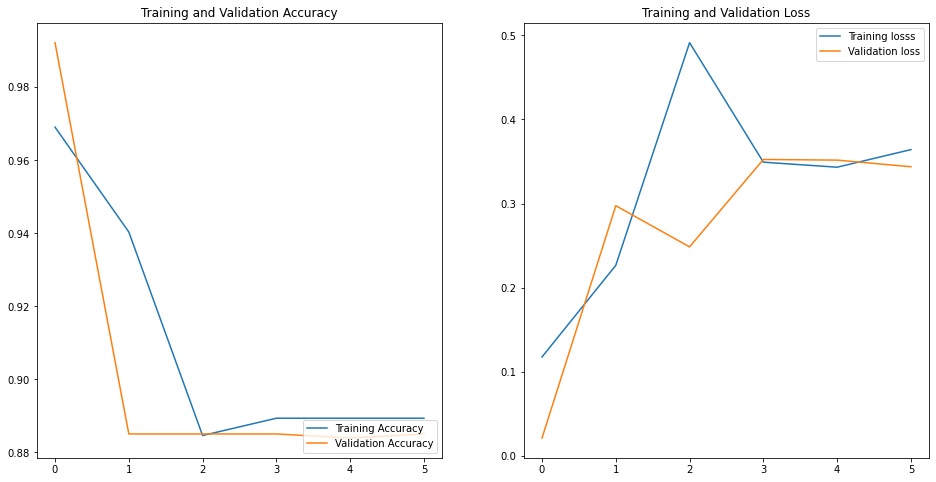

In [241]:

plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label ='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS ), loss, label ='Training losss')
plt.plot(range(EPOCHS), val_loss , label ='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual lable: Tomato__Unhealthy
Predicted lable : Tomato__Unhealthy


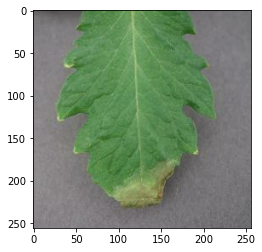

In [242]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual lable:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    predict_class =  class_names[np.argmax(batch_prediction[0])]
    
    print("Predicted lable :",predict_class)
   

In [243]:
import scikitplot as skplt

In [244]:
from keras.preprocessing.image import ImageDataGenerator

In [245]:
model_test_datagen = ImageDataGenerator()

model_test_generator = model_test_datagen.flow_from_directory(
        "base_input",
        target_size=(256, 256),
        batch_size=1 ,
        shuffle = True,
        class_mode='categorical')

filenames = model_test_generator.filenames
nb_samples = len(filenames)

model_predict = model.predict(model_test_generator, steps = nb_samples, verbose=1)

Found 9000 images belonging to 2 classes.
9000/9000 [==============================] - 167s 19ms/step


In [246]:
print(model_predict)

[[2.2364706e-02 9.9926007e-01]
 [7.0729256e-03 9.9631536e-01]
 [7.6569319e-03 9.9675584e-01]
 ...
 [5.2116691e-05 1.0000000e+00]
 [3.0229598e-02 9.9944484e-01]
 [4.3522865e-02 9.9131644e-01]]


[[ 117  883]
 [ 877 7123]]


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

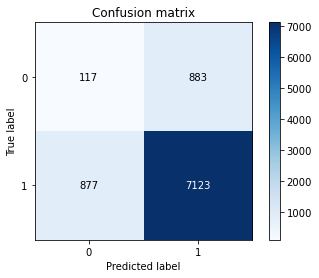

In [266]:
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_true =  model_test_generator.classes
y_pred = model_predict.argmax(axis =1)
cm = confusion_matrix(y_true, y_pred)
print(cm)
skplt.metrics.plot_confusion_matrix(y_true,y_pred ,title='Confusion matrix')


In [269]:
print(y_true)

[0 0 0 ... 1 1 1]


In [270]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [271]:
# import warnings
# warnings.filterwarnings('always') 
# # Classification Report
# from sklearn.metrics import classification_report
# print(classification_report(y_true, y_pred))

In [276]:
y_true[0]

0

In [279]:
precision = dict()
recall = dict()
for i in range(2):
    precision[i], recall[i], threshold = precision_recall_curve(y_true[i], y_pred[i])
    plt.plot(recall[i], precision[i], lw = 2, label='class {}'.format(i))
plt.xlabel("recall")
plt.ylabel('precision')
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

TypeError: Singleton array 0 cannot be considered a valid collection.

In [258]:
threshold

array([0, 1], dtype=int64)

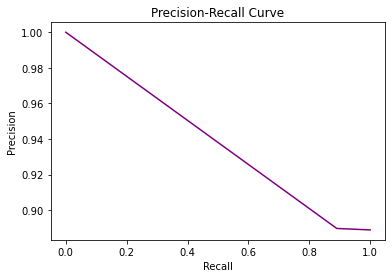

In [259]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall,threshold = precision_recall_curve(y_true , y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [253]:
print("Precision :",precision)


Precision : [0.88888889 0.88970772 1.        ]


In [254]:
print("Recall :", recall)

Recall : [1.       0.890375 0.      ]


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/ARADHANA/Documents/hyper_models") + [0]])+1
model.save(f"C:/Users/ARADHANA/Documents/hyper_models/{model_version}")

In [ ]:
model.save("C:/Users/ARADHANA/Documents/tomato_model_corr.h5")